In [1]:
#MULTIPLE LINEAR REGRESSION

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
%matplotlib inline

In [10]:
import statsmodels.api as sm
df = pd.read_csv(r"C:\Users\Admin\OneDrive\Desktop\EXCELR\Assignments\MLR\ToyotaCorolla - MLR.csv")
print(df)

      Price  Age_08_04     KM Fuel_Type   HP  Automatic    cc  Doors  \
0     13500         23  46986    Diesel   90          0  2000      3   
1     13750         23  72937    Diesel   90          0  2000      3   
2     13950         24  41711    Diesel   90          0  2000      3   
3     14950         26  48000    Diesel   90          0  2000      3   
4     13750         30  38500    Diesel   90          0  2000      3   
...     ...        ...    ...       ...  ...        ...   ...    ...   
1431   7500         69  20544    Petrol   86          0  1300      3   
1432  10845         72  19000    Petrol   86          0  1300      3   
1433   8500         71  17016    Petrol   86          0  1300      3   
1434   7250         70  16916    Petrol   86          0  1300      3   
1435   6950         76      1    Petrol  110          0  1600      5   

      Cylinders  Gears  Weight  
0             4      5    1165  
1             4      5    1165  
2             4      5    1165  
3  

In [5]:
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [8]:
df.isnull().sum()

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [14]:
df.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [11]:
df.shape

(1436, 11)

In [13]:
df.columns

Index(['Price', 'Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'cc',
       'Doors', 'Cylinders', 'Gears', 'Weight'],
      dtype='object')

In [16]:
df.dtypes

Price         int64
Age_08_04     int64
KM            int64
Fuel_Type    object
HP            int64
Automatic     int64
cc            int64
Doors         int64
Cylinders     int64
Gears         int64
Weight        int64
dtype: object

In [29]:
df.size

15796

In [31]:
from sklearn.preprocessing import LabelEncoder

In [32]:
label_encoder = LabelEncoder()
df['Fuel_Type'] = label_encoder.fit_transform(df['Fuel_Type'])

In [33]:
df.dtypes

Price        int64
Age_08_04    int64
KM           int64
Fuel_Type    int32
HP           int64
Automatic    int64
cc           int64
Doors        int64
Cylinders    int64
Gears        int64
Weight       int64
dtype: object

In [34]:
corr = df.corr()
corr

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
Price,1.000000,-0.876590,-0.569960,-0.022157,0.314990,0.033081,0.126389,0.185326,NaN,0.063104,0.581198
Age_08_04,-0.876590,1.000000,0.505672,0.080261,-0.156622,0.031717,-0.098084,-0.148359,NaN,-0.005364,-0.470253
KM,-0.569960,0.505672,1.000000,-0.420586,-0.333538,-0.081854,0.102683,-0.036197,NaN,0.015023,-0.028598
Fuel_Type,-0.022157,0.080261,-0.420586,1.000000,0.409476,0.069718,-0.277239,-0.026935,NaN,0.069655,-0.505303
HP,0.314990,-0.156622,-0.333538,0.409476,1.000000,0.013144,0.035856,0.092424,NaN,0.209477,0.089614
Automatic,0.033081,0.031717,-0.081854,0.069718,0.013144,1.000000,0.066740,-0.027654,NaN,-0.098555,0.057249
cc,0.126389,-0.098084,0.102683,-0.277239,0.035856,0.066740,1.000000,0.079903,NaN,0.014629,0.335637
Doors,0.185326,-0.148359,-0.036197,-0.026935,0.092424,-0.027654,0.079903,1.000000,NaN,-0.160141,0.302618
Cylinders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gears,0.063104,-0.005364,0.015023,0.069655,0.209477,-0.098555,0.014629,-0.160141,NaN,1.000000,0.020613


In [35]:
df.corr()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
Price,1.000000,-0.876590,-0.569960,-0.022157,0.314990,0.033081,0.126389,0.185326,NaN,0.063104,0.581198
Age_08_04,-0.876590,1.000000,0.505672,0.080261,-0.156622,0.031717,-0.098084,-0.148359,NaN,-0.005364,-0.470253
KM,-0.569960,0.505672,1.000000,-0.420586,-0.333538,-0.081854,0.102683,-0.036197,NaN,0.015023,-0.028598
Fuel_Type,-0.022157,0.080261,-0.420586,1.000000,0.409476,0.069718,-0.277239,-0.026935,NaN,0.069655,-0.505303
HP,0.314990,-0.156622,-0.333538,0.409476,1.000000,0.013144,0.035856,0.092424,NaN,0.209477,0.089614
Automatic,0.033081,0.031717,-0.081854,0.069718,0.013144,1.000000,0.066740,-0.027654,NaN,-0.098555,0.057249
cc,0.126389,-0.098084,0.102683,-0.277239,0.035856,0.066740,1.000000,0.079903,NaN,0.014629,0.335637
Doors,0.185326,-0.148359,-0.036197,-0.026935,0.092424,-0.027654,0.079903,1.000000,NaN,-0.160141,0.302618
Cylinders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gears,0.063104,-0.005364,0.015023,0.069655,0.209477,-0.098555,0.014629,-0.160141,NaN,1.000000,0.020613


In [42]:
df.drop(columns=['Doors','Cylinders'],inplace =True)

In [43]:
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Gears,Weight
0,13500,23,46986,1,90,0,2000,5,1165
1,13750,23,72937,1,90,0,2000,5,1165
2,13950,24,41711,1,90,0,2000,5,1165
3,14950,26,48000,1,90,0,2000,5,1165
4,13750,30,38500,1,90,0,2000,5,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,2,86,0,1300,5,1025
1432,10845,72,19000,2,86,0,1300,5,1015
1433,8500,71,17016,2,86,0,1300,5,1015
1434,7250,70,16916,2,86,0,1300,5,1015


<Axes: >

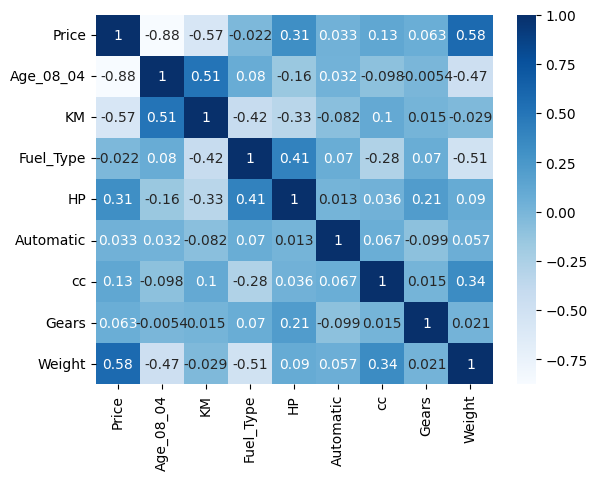

In [44]:
corr = df.corr()
sns.heatmap(corr, cmap = 'Blues', annot = True)

<Axes: >

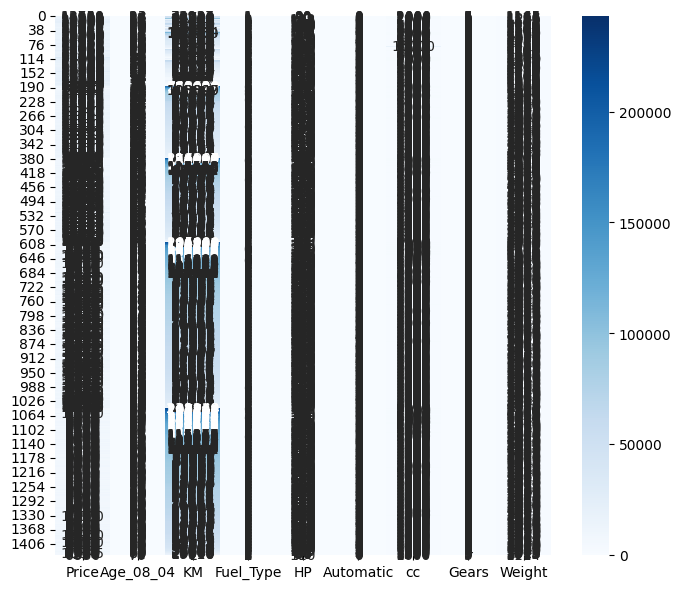

In [50]:
plt.figure(figsize= (8,7))
sns.heatmap(df, cmap='Blues', annot=True, fmt='d')

<Axes: xlabel='Price', ylabel='Count'>

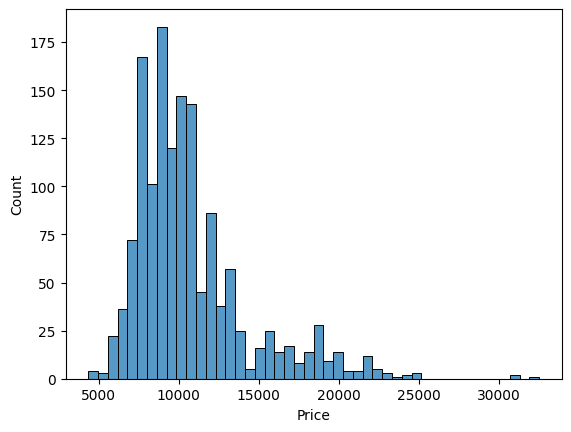

In [47]:
sns.histplot(x='Price',data=df)

<Axes: xlabel='Price', ylabel='Count'>

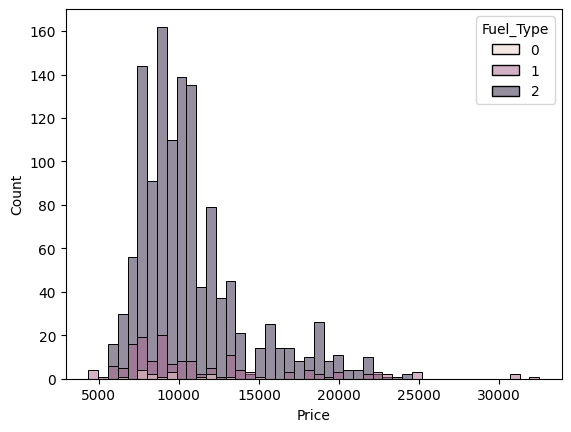

In [48]:
sns.histplot(x='Price',hue='Fuel_Type',data=df)

<Axes: xlabel='Price', ylabel='Age_08_04'>

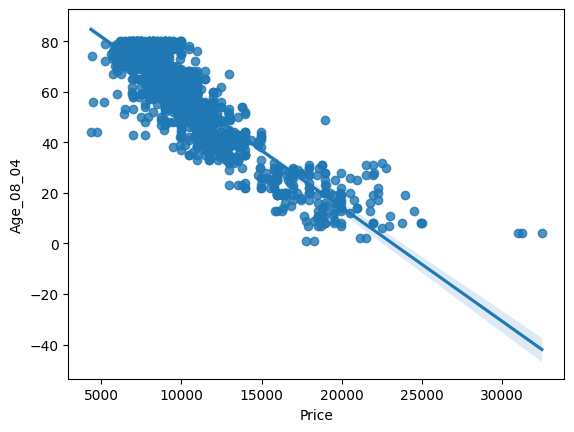

In [49]:
sns.regplot(data=df, x="Price", y="Age_08_04")

<Axes: xlabel='Automatic', ylabel='KM'>

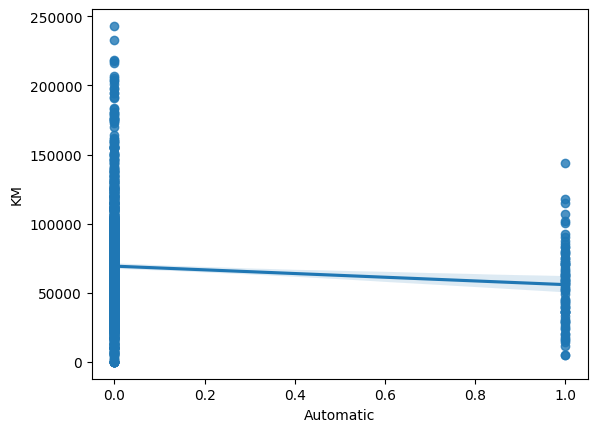

In [20]:
sns.regplot(data=df, x="Automatic", y="KM")

<Axes: xlabel='Fuel_Type', ylabel='Gears'>

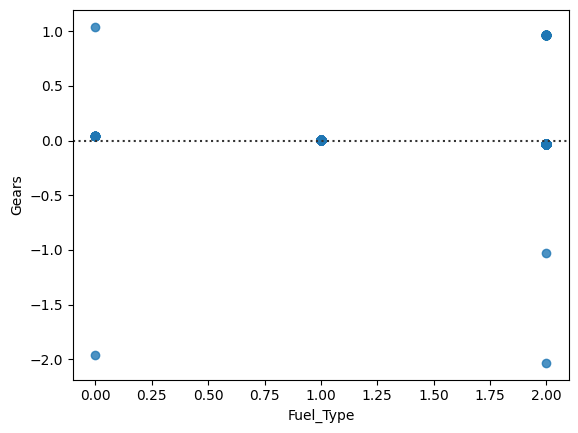

In [51]:
sns.residplot(data=df, x="Fuel_Type", y="Gears")

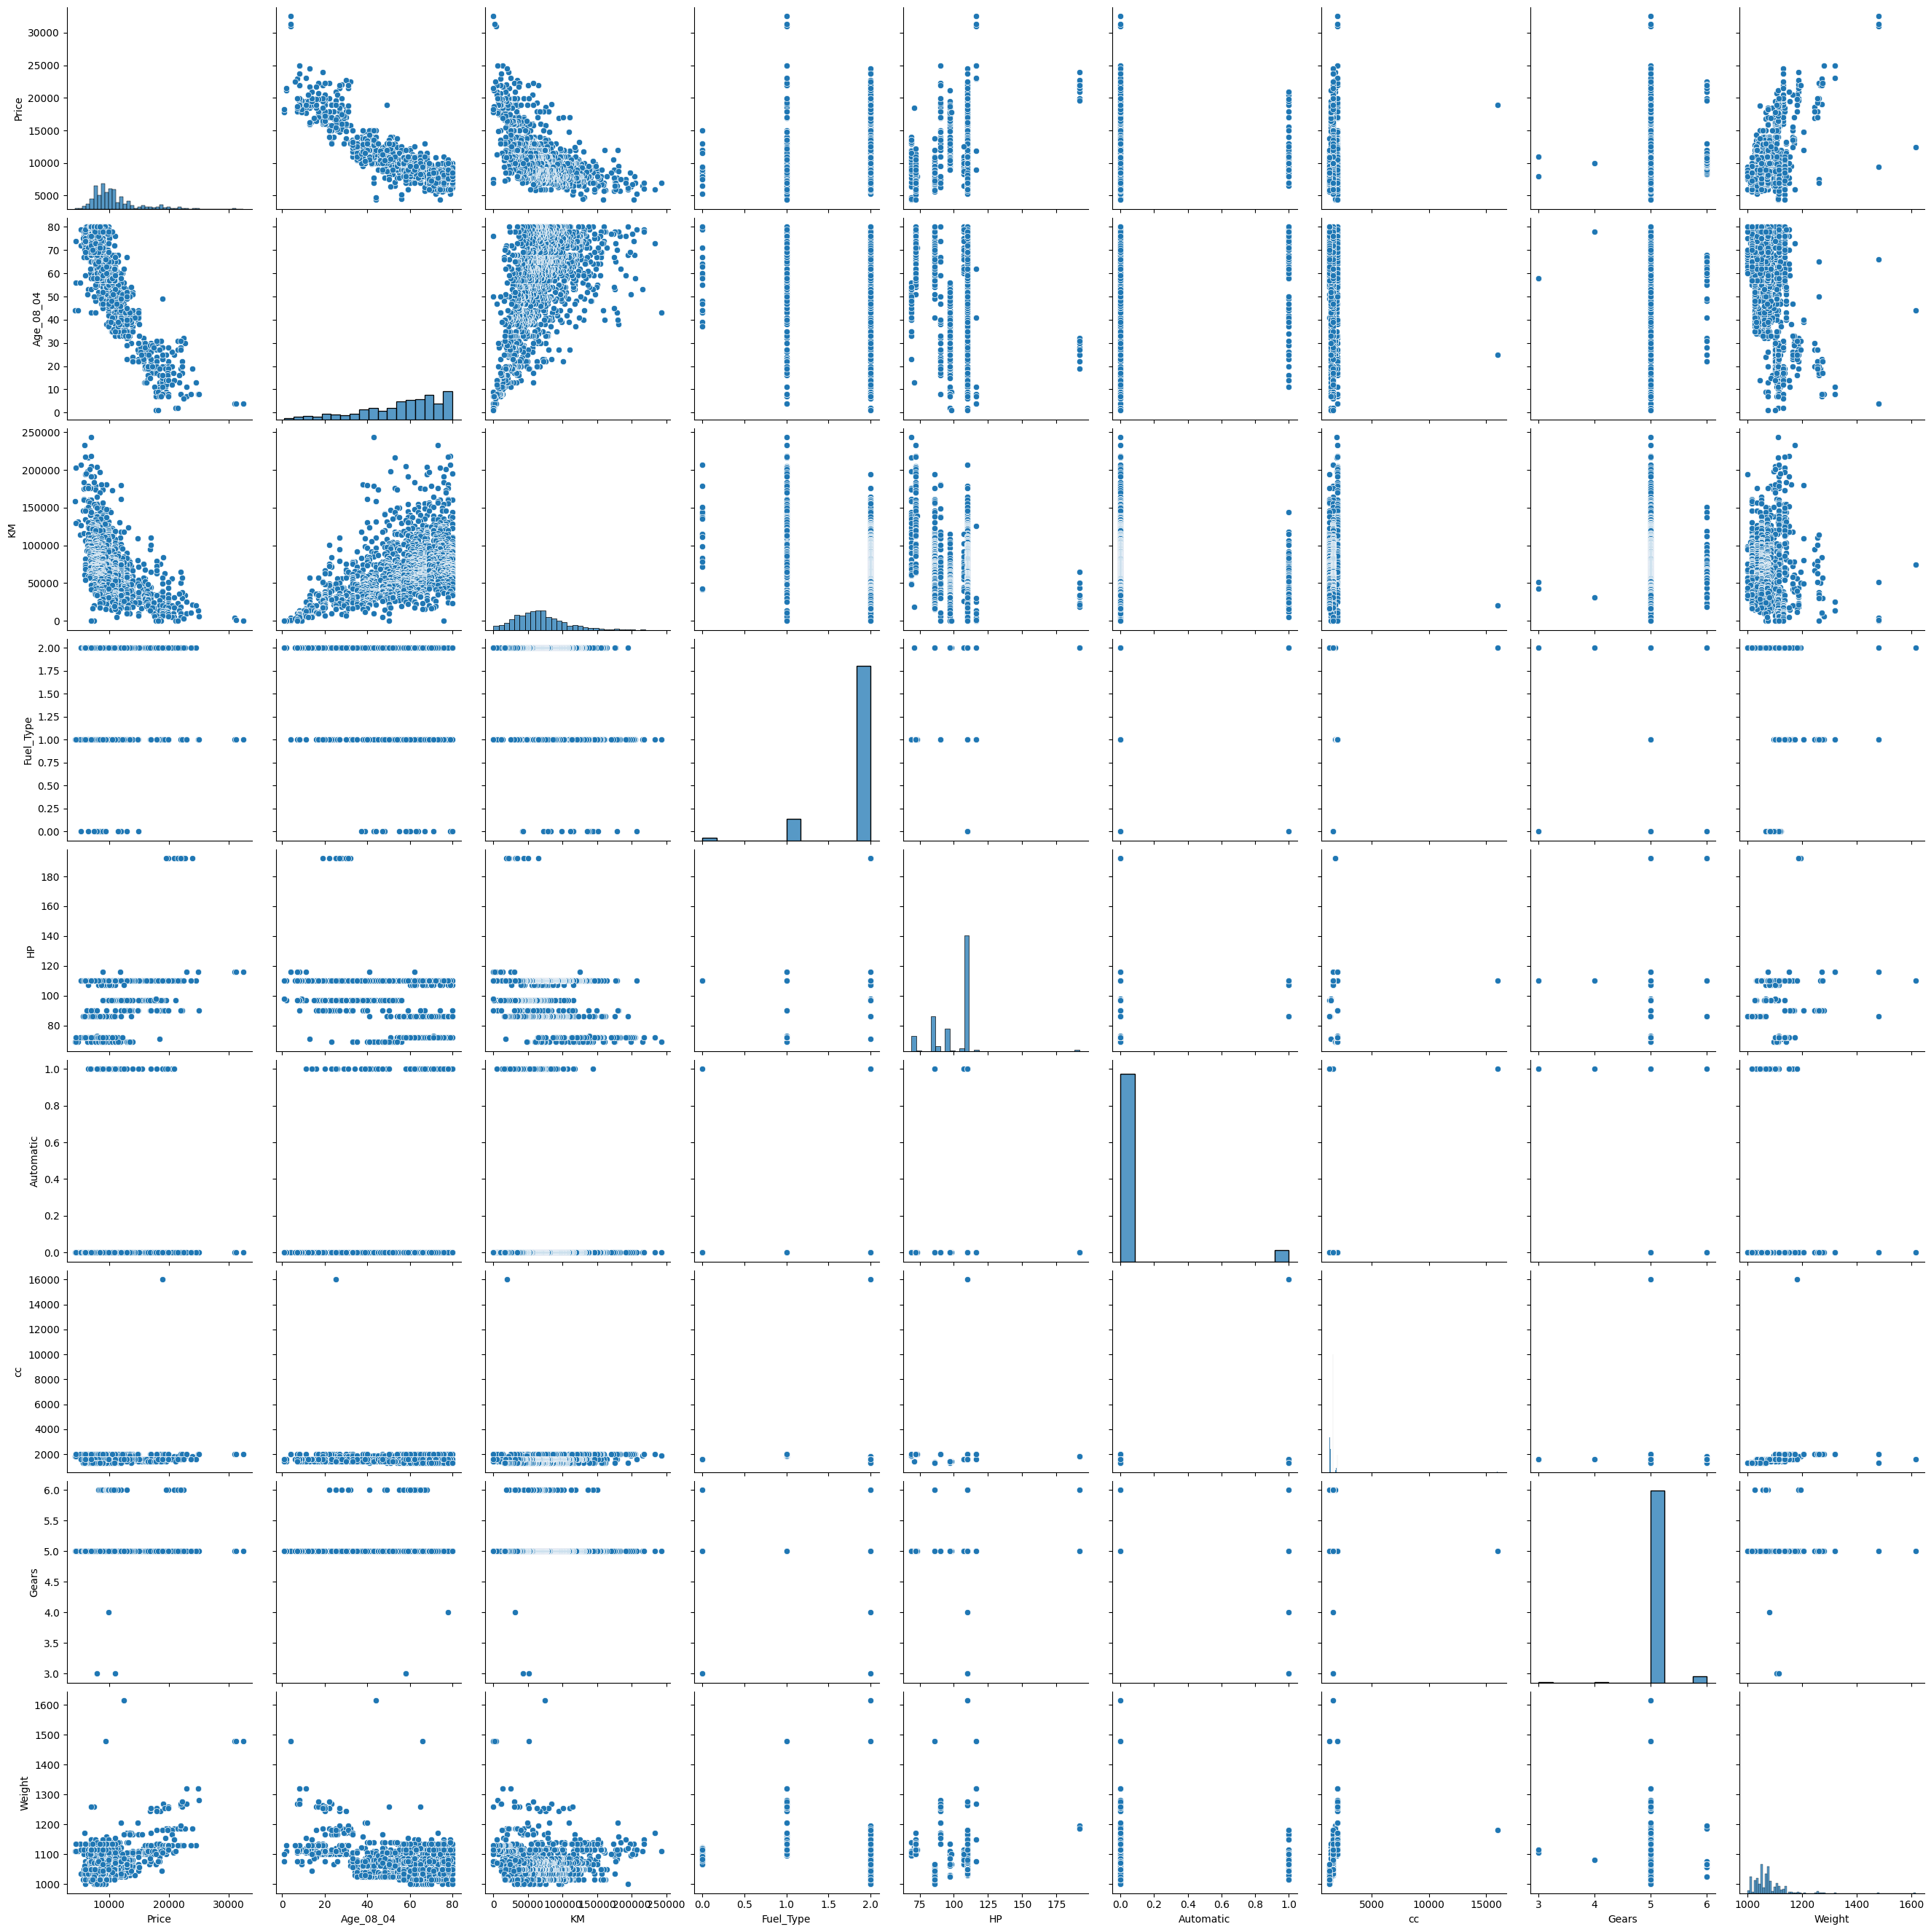

In [54]:
sns.pairplot(data=df, height=3)

In [53]:
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Gears,Weight
0,13500,23,46986,1,90,0,2000,5,1165
1,13750,23,72937,1,90,0,2000,5,1165
2,13950,24,41711,1,90,0,2000,5,1165
3,14950,26,48000,1,90,0,2000,5,1165
4,13750,30,38500,1,90,0,2000,5,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,2,86,0,1300,5,1025
1432,10845,72,19000,2,86,0,1300,5,1015
1433,8500,71,17016,2,86,0,1300,5,1015
1434,7250,70,16916,2,86,0,1300,5,1015


In [55]:
X = df.iloc[:,1:]
y = df.iloc[:,0]
print(X)
print(y)

      Age_08_04     KM  Fuel_Type   HP  Automatic    cc  Gears  Weight
0            23  46986          1   90          0  2000      5    1165
1            23  72937          1   90          0  2000      5    1165
2            24  41711          1   90          0  2000      5    1165
3            26  48000          1   90          0  2000      5    1165
4            30  38500          1   90          0  2000      5    1170
...         ...    ...        ...  ...        ...   ...    ...     ...
1431         69  20544          2   86          0  1300      5    1025
1432         72  19000          2   86          0  1300      5    1015
1433         71  17016          2   86          0  1300      5    1015
1434         70  16916          2   86          0  1300      5    1015
1435         76      1          2  110          0  1600      5    1114

[1436 rows x 8 columns]
0       13500
1       13750
2       13950
3       14950
4       13750
        ...  
1431     7500
1432    10845
1433     85

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 42)

In [57]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1148, 8), (288, 8), (1148,), (288,))

In [58]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1148, 8)
(288, 8)
(1148,)
(288,)


In [59]:
regression_model = LinearRegression()
regression_model.fit(X = pd.DataFrame(df["Price"]), y = df["KM"])
print(regression_model)

LinearRegression()


In [60]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [61]:
regression_model.coef_

array([-1.21461006e+02, -1.70095066e-02,  8.39612057e+02,  2.06134883e+01,
        2.57226821e+02, -7.28862869e-02,  5.66624645e+02,  2.32190680e+01])

In [62]:
regression_model.intercept_

-12601.6600448815

In [63]:
print(f'training score:{regression_model.score(X_train, y_train)}')
print(f'testing score:{regression_model.score(X_test, y_test)}')

training score:0.8694255718969183
testing score:0.8429419375585392


In [64]:
y_pred = regression_model.predict(X_train)
y_pred_df = pd.DataFrame({'actual data': y_train, 'predicted_data': y_pred})
y_pred_df.head()

,actual data,predicted_data
899,9500,9081.269451
881,9795,8786.698639
310,12950,13622.237717
1145,6450,8063.876984
31,15750,16078.269934


In [70]:
y_pred = regression_model.predict(X_test)

In [79]:
y_pred_df = pd.DataFrame({'actual data': y_test, 'predicted_data': y_pred, 'Difference': y_test-y_pred})
y_pred_df

,actual data,predicted_data,Difference
594,10800,11151.935382,-351.935382
754,9950,8930.314724,1019.685276
630,7500,9385.680815,-1885.680815
1259,9250,8989.501802,260.498198
903,9750,10123.524791,-373.524791
...,...,...,...
174,21950,19160.922724,2789.077276
1428,8450,7968.609551,481.390449
297,12850,13576.550182,-726.550182
1435,6950,10696.541256,-3746.541256


In [81]:
mse = (y_test-y_pred)**2
print(f"MSE: {mse.mean():0.2f} (+/- {mse.std():0.2f})")

mae = np.abs(y_test-y_pred)
print(f"MAE: {mae.mean():0.2f} (+/- {mae.std():0.2f})")

rmse = np.sqrt(mse.mean())
print(f"RMSE: {rmse:0.2f}")

#R^2 coefficient of determination
SE_line = sum((y_test-y_pred)**2)
SE_mean = sum((y_test-y_test.mean())**2)
r2 = 1-(SE_line/SE_mean)
print(f"R^2 coefficient of detemination: {r2:0.2f}%")

MSE: 2095592.56 (+/- 9593699.60)
MAE: 996.59 (+/- 1051.78)
RMSE: 1447.62
R^2 coefficient of detemination: 0.84%


In [80]:
LR_model = LinearRegression()
r2 = r2_score(y_test, y_pred)
print(f'R2_score for training: ,score(y_test, y_pred)')

mse = mean_squared_error(y_test, y_pred)
print(mse)
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
print(RMSE)
R_score = r2_score(y_test, y_pred)
print(f'R2_score of testing : {R_score}')

R2_score for training: ,score(y_test, y_pred)
2095592.5633573392
1447.6161657557363
R2_score of testing : 0.8429419375585392


In [85]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def vif(X):
    vif = pd.DataFrame()
    vif["Variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)

In [87]:
calc_vif(X)

,Variables,VIF
0,Age_08_04,17.068088
1,KM,8.410716
2,Fuel_Type,47.620944
3,HP,66.407417
4,Automatic,1.114119
5,cc,17.300069
6,Gears,487.125771
7,Weight,380.154654


In [88]:
X.head()

,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Gears,Weight
0,23,46986,1,90,0,2000,5,1165
1,23,72937,1,90,0,2000,5,1165
2,24,41711,1,90,0,2000,5,1165
3,26,48000,1,90,0,2000,5,1165
4,30,38500,1,90,0,2000,5,1170


In [92]:
X = X.drop(['Fuel_Type','Gears','cc','Weight'],axis = 1)

In [93]:
vif(X)

,Variables,VIF
0,Age_08_04,12.628088
1,KM,5.828283
2,HP,7.587674
3,Automatic,1.072676


In [94]:
train_X, test_X, train_y, test_y = train_test_split(X,y, test_size = 0.2, random_state = 1000)
print(len(df))
print(train_X.shape, test_X.shape)
print(train_y.shape, test_y.shape)

1436
(1148, 4) (288, 4)
(1148,) (288,)


In [95]:
print(X_train)

      Age_08_04      KM  Fuel_Type   HP  Automatic    cc  Gears  Weight
899          62   59295          2   86          0  1300      5    1035
881          68   61568          2  110          0  1600      5    1035
310          40   38653          2  110          0  1600      5    1080
1145         75  101855          2  110          0  1600      5    1070
31           22   35199          2   97          0  1400      5    1100
...         ...     ...        ...  ...        ...   ...    ...     ...
1095         76  125778          2  110          0  1600      5    1050
1130         73  107108          2  110          0  1600      5    1050
1294         80   71740          2  110          0  1600      5    1070
860          63   64690          2   86          0  1300      5    1020
1126         80  110000          2  110          0  1600      5    1035

[1148 rows x 8 columns]


In [97]:
print(y_train)

899      9500
881      9795
310     12950
1145     6450
31      15750
        ...  
1095     6900
1130     7950
1294     6950
860      9750
1126     6800
Name: Price, Length: 1148, dtype: int64


In [ ]:
#Linear Regression2

In [103]:
regression_model2 = LinearRegression()
regression_model2.fit(X = pd.DataFrame(df["Price"]), y = df["KM"])
print(regression_model2)

LinearRegression()


In [104]:
regression_model2 = LinearRegression()
regression_model2.fit(X_train, y_train)

LinearRegression()

In [105]:
regression_model2.coef_

array([-1.21461006e+02, -1.70095066e-02,  8.39612057e+02,  2.06134883e+01,
        2.57226821e+02, -7.28862869e-02,  5.66624645e+02,  2.32190680e+01])

In [106]:
regression_model2.intercept_

-12601.6600448815

In [107]:
print(f'training score:{regression_model2.score(X_train, y_train)}')
print(f'testing score:{regression_model2.score(X_test, y_test)}')

training score:0.8694255718969183
testing score:0.8429419375585392


In [111]:
y_pred2 = regression_model2.predict(X_test)
y_pred2_df = pd.DataFrame({'actual data': y_test, 'predicted_data': y_pred2, 'Difference': y_test-y_pred2})
y_pred2_df

,actual data,predicted_data,Difference
594,10800,11151.935382,-351.935382
754,9950,8930.314724,1019.685276
630,7500,9385.680815,-1885.680815
1259,9250,8989.501802,260.498198
903,9750,10123.524791,-373.524791
...,...,...,...
174,21950,19160.922724,2789.077276
1428,8450,7968.609551,481.390449
297,12850,13576.550182,-726.550182
1435,6950,10696.541256,-3746.541256


In [112]:
mse2 = (y_test-y_pred2)**2
print(f"MSE2: {mse2.mean():0.2f} (+/- {mse2.std():0.2f})")

mae2 = np.abs(y_test-y_pred2)
print(f"MAE2: {mae2.mean():0.2f} (+/- {mae2.std():0.2f})")

rmse2 = np.sqrt(mse2.mean())
print(f"RMSE2: {rmse2:0.2f}")

#R^2 coefficient of determination
SE_line = sum((y_test-y_pred2)**2)
SE_mean = sum((y_test-y_test.mean())**2)
r2 = 1-(SE_line/SE_mean)
print(f"R^2 coefficient of detemination: {r2:0.2f}%")

MSE2: 2095592.56 (+/- 9593699.60)
MAE2: 996.59 (+/- 1051.78)
RMSE2: 1447.62
R^2 coefficient of detemination: 0.84%


In [114]:
LR_model = LinearRegression()
r2 = r2_score(y_test, y_pred2)
print(f'R2_score for training: ,score(y_test, y_pred2)')

mse2 = mean_squared_error(y_test, y_pred2)
print(mse2)
RMSE2 = np.sqrt(mean_squared_error(y_test, y_pred2))
print(RMSE2)
R2_score = r2_score(y_test, y_pred2)
print(f'R2_score of testing : {R_score}')

R2_score for training: ,score(y_test, y_pred2)
2095592.5633573392
1447.6161657557363
R2_score of testing : 0.8429419375585392


In [117]:
X = X.drop(['Automatic'],axis = 1)

In [118]:
vif(X)

,Variables,VIF
0,Age_08_04,12.504151
1,KM,5.761681
2,HP,7.569783


In [119]:
train_X, test_X, train_y, test_y = train_test_split(X,y, test_size = 0.2, random_state = 100)
print(len(df))
print(train_X.shape, test_X.shape)
print(train_y.shape, test_y.shape)

1436
(1148, 3) (288, 3)
(1148,) (288,)


In [120]:
print(X_train)

      Age_08_04      KM  Fuel_Type   HP  Automatic    cc  Gears  Weight
899          62   59295          2   86          0  1300      5    1035
881          68   61568          2  110          0  1600      5    1035
310          40   38653          2  110          0  1600      5    1080
1145         75  101855          2  110          0  1600      5    1070
31           22   35199          2   97          0  1400      5    1100
...         ...     ...        ...  ...        ...   ...    ...     ...
1095         76  125778          2  110          0  1600      5    1050
1130         73  107108          2  110          0  1600      5    1050
1294         80   71740          2  110          0  1600      5    1070
860          63   64690          2   86          0  1300      5    1020
1126         80  110000          2  110          0  1600      5    1035

[1148 rows x 8 columns]


In [121]:
print(y_train)

899      9500
881      9795
310     12950
1145     6450
31      15750
        ...  
1095     6900
1130     7950
1294     6950
860      9750
1126     6800
Name: Price, Length: 1148, dtype: int64


In [ ]:
#Linear Regression

In [122]:
regression_model3 = LinearRegression()
regression_model3.fit(X = pd.DataFrame(df["Price"]), y = df["KM"])
print(regression_model3)

LinearRegression()


In [123]:
regression_model = LinearRegression()
regression_model3.fit(X_train, y_train)

LinearRegression()

In [124]:
regression_model3.coef_

array([-1.21461006e+02, -1.70095066e-02,  8.39612057e+02,  2.06134883e+01,
        2.57226821e+02, -7.28862869e-02,  5.66624645e+02,  2.32190680e+01])

In [125]:
regression_model3.intercept_

-12601.6600448815

In [126]:
print(f'training score:{regression_model3.score(X_train, y_train)}')
print(f'testing score:{regression_model3.score(X_test, y_test)}')

training score:0.8694255718969183
testing score:0.8429419375585392


In [127]:
y_pred3 = regression_model3.predict(X_test)
y_pred3_df = pd.DataFrame({'actual data': y_test, 'predicted_data': y_pred3, 'Difference': y_test-y_pred3})
y_pred3_df

,actual data,predicted_data,Difference
594,10800,11151.935382,-351.935382
754,9950,8930.314724,1019.685276
630,7500,9385.680815,-1885.680815
1259,9250,8989.501802,260.498198
903,9750,10123.524791,-373.524791
...,...,...,...
174,21950,19160.922724,2789.077276
1428,8450,7968.609551,481.390449
297,12850,13576.550182,-726.550182
1435,6950,10696.541256,-3746.541256


In [128]:
mse3 = (y_test-y_pred3)**2
print(f"MSE3: {mse3.mean():0.2f} (+/- {mse3.std():0.2f})")

mae3 = np.abs(y_test-y_pred2)
print(f"MAE3: {mae3.mean():0.2f} (+/- {mae3.std():0.2f})")

rmse3 = np.sqrt(mse3.mean())
print(f"RMSE3: {rmse3:0.2f}")

#R^2 coefficient of determination
SE_line = sum((y_test-y_pred3)**2)
SE_mean = sum((y_test-y_test.mean())**2)
r3 = 1-(SE_line/SE_mean)
print(f"R^2 coefficient of detemination: {r2:0.2f}%")

MSE3: 2095592.56 (+/- 9593699.60)
MAE3: 996.59 (+/- 1051.78)
RMSE3: 1447.62
R^2 coefficient of detemination: 0.84%


In [130]:
LR_model = LinearRegression()
r3 = r2_score(y_test, y_pred2)
print(f'R2_score for training: ,score(y_test, y_pred2)')

mse3 = mean_squared_error(y_test, y_pred3)
print(mse3)
RMSE3 = np.sqrt(mean_squared_error(y_test, y_pred3))
print(RMSE3)
R2_3score = r2_score(y_test, y_pred3)
print(f'R2_3score of testing : {R2_3score}')

R2_score for training: ,score(y_test, y_pred2)
2095592.5633573392
1447.6161657557363
R2_3score of testing : 0.8429419375585392


In [131]:
vif(X)

,Variables,VIF
0,Age_08_04,12.504151
1,KM,5.761681
2,HP,7.569783


In [132]:
train_X, test_X, train_y, test_y = train_test_split(X,y, test_size = 0.2, random_state = 100)
print(len(df))
print(train_X.shape, test_X.shape)
print(train_y.shape, test_y.shape)

1436
(1148, 3) (288, 3)
(1148,) (288,)


In [133]:
print(X_train)

      Age_08_04      KM  Fuel_Type   HP  Automatic    cc  Gears  Weight
899          62   59295          2   86          0  1300      5    1035
881          68   61568          2  110          0  1600      5    1035
310          40   38653          2  110          0  1600      5    1080
1145         75  101855          2  110          0  1600      5    1070
31           22   35199          2   97          0  1400      5    1100
...         ...     ...        ...  ...        ...   ...    ...     ...
1095         76  125778          2  110          0  1600      5    1050
1130         73  107108          2  110          0  1600      5    1050
1294         80   71740          2  110          0  1600      5    1070
860          63   64690          2   86          0  1300      5    1020
1126         80  110000          2  110          0  1600      5    1035

[1148 rows x 8 columns]


In [134]:
print(y_train)

899      9500
881      9795
310     12950
1145     6450
31      15750
        ...  
1095     6900
1130     7950
1294     6950
860      9750
1126     6800
Name: Price, Length: 1148, dtype: int64


In [135]:
mlr_model3 = sm.OLS(train_y, train_X).fit()
mlr_model3

In [136]:
mlr_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.951
Model:                            OLS   Adj. R-squared (uncentered):              0.951
Method:                 Least Squares   F-statistic:                              7386.
Date:                Thu, 30 May 2024   Prob (F-statistic):                        0.00
Time:                        11:28:06   Log-Likelihood:                         -10620.
No. Observations:                1148   AIC:                                  2.125e+04
Df Residuals:                    1145   BIC:                                  2.126e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Age_08_04   -119.4082      4.444    -26.867      0.000    -128.128    -110.688
KM             0.0077      0.002      3.342      0.001       0.003       0.012
HP           164.5443      1.983     82.975      0.000     160.653     168.435
==============================================================================
Omnibus:                      101.554   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              175.179
Skew:                           0.611   Prob(JB):                     9.13e-39
Kurtosis:                       4.472   Cond. No.                     4.91e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 4.91e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [137]:
# Lasso and Ridge methods on the model.

In [138]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
import sklearn

In [139]:
#Using the Linear CV Model
from sklearn.linear_model import LassoCV

#lasso Cross Validation
lasso_cv = LassoCV(alphas = [0.1], random_state=10).fit(X_train, y_train)

#Score
print(f'training score:{lasso_cv.score(X_train, y_train)}')
print(f'testing score:{lasso_cv.score(X_test, y_test)}')


training score:0.8694255718968714
testing score:0.8429419469521915


In [140]:
mse = mean_squared_error(y_test, y_pred)
print(mse)
RMSE3 = np.sqrt(mean_squared_error(y_test, y_pred))
print(RMSE)
R2_score = r2_score(y_test, y_pred)
print(f'R2_score of testing : {R2_score}')

2095592.5633573392
1447.6161657557363
R2_score of testing : 0.8429419375585392


In [142]:
#Using the Linear CV Model
from sklearn.linear_model import RidgeCV

#lasso Cross Validation
ridge_cv = RidgeCV(alphas = [0.0001, 0.002, 0.001, 0.01, 0.02, 0.1, 1, 10]).fit(X_train, y_train)

#Score
print("The train score for ridge model is {}".format(ridge_cv.score(X_train, y_train)))
print("The test score for ridge model is {}".format(ridge_cv.score(X_test, y_test)))

The train score for ridge model is -1.1699498516419826
The test score for ridge model is -1.1015849581824528


In [145]:
alpha = 0.1
model = Ridge(alpha=alpha)
model.fit(X_train,y_train)

Ridge(alpha=0.1)

In [148]:
mse = mean_squared_error(y_test, y_pred)
print(mse)
RMSE = np.sqrt(mean_squared_error(y_test, y_predMOstMost
print(RMSE)
R2_score = r2_score(y_test, y_pred)
print(f'R2_score of testing : {R2_score}')

2095592.5633573392
1447.6161657557363
R2_score of testing : 0.8429419375585392


In [149]:
# 1.What is Normalization & Standardization and how is it helpful?

In [150]:
# 2.What techniques can be used to address multicollinearity in multiple linear regression?